In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Praktikum ML/Praktikum11/Data/indonesia_earthquake.csv")

coords = df[['latitude', 'longitude']].dropna()

coords.head()

,latitude,longitude
0,-0.604440,98.895531
1,-6.611860,129.387220
2,-3.650586,127.990680
3,-4.198925,128.097000
4,-4.091891,128.200470


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


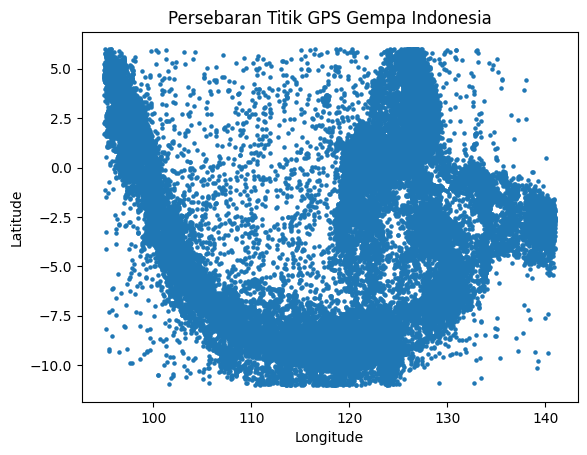

In [3]:
import matplotlib.pyplot as plt

plt.scatter(coords['longitude'], coords['latitude'], s=5)
plt.title("Persebaran Titik GPS Gempa Indonesia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [4]:
from sklearn.cluster import DBSCAN
import numpy as np

X = coords[['latitude', 'longitude']].values

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

coords['cluster'] = labels


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


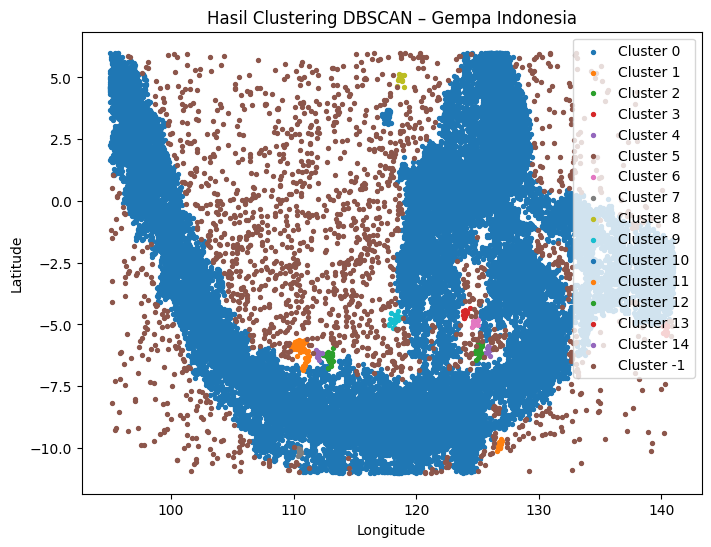

In [5]:
unique_labels = set(labels)

plt.figure(figsize=(8,6))
for label in unique_labels:
    mask = (labels == label)
    plt.scatter(X[mask][:,1], X[mask][:,0], s=8, label=f"Cluster {label}")

plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hasil Clustering DBSCAN – Gempa Indonesia")
plt.show()
